In [66]:
import pandas as pd

In [67]:
df =pd.read_csv("student_habits_performance.csv",index_col=0)
df.head(5)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [68]:
X = df.drop(columns=["exam_score"])
y = df["exam_score"]

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [70]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=25, random_state=42))
])

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=25, n_estimators=200,
                                       random_state=42))])

In [74]:
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [76]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

mae,mse,r2

(5.000747499999996, 38.92542081374993, 0.848202012092458)

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "regressor__n_estimators": list(range(5, 55)),
    "regressor__max_depth": list(range(1, 25))
}

grid = GridSearchCV(
    model,                # Burada Pipeline'ı veriyoruz
    param_grid=param_grid, # Burada düzeltilmiş parametreler
    scoring="r2",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'study_hours_per_day',
                                                                          'social_media_hours',
                                                                          'netflix_hours',
                                                                          'attendance_percentage',
                                                                          'sleep_hours',
                                                                          'exercise_frequency',
                                                                          'mental_health_rating']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'part_time_job',
                                                                          'diet_qualit...
                                                                          'extracurricular_participation'])])),
                                       ('regressor',
                                        RandomForestRegressor(max_depth=25,
                                                              n_estimators=200,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24],
                         'regressor__n_estimators': [5, 6, 7, 8, 9, 10, 11, 12,
                                                     13, 14, 15, 16, 17, 18, 19,
                                                     20, 21, 22, 23, 24, 25, 26,
                                                     27, 28, 29, 30, 31, 32, 33,
                                                     34, ...]},
             scoring='r2')

In [78]:
grid.best_estimator_,grid.best_score_,grid.best_params_

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['age', 'study_hours_per_day',
                                                    'social_media_hours',
                                                    'netflix_hours',
                                                    'attendance_percentage',
                                                    'sleep_hours',
                                                    'exercise_frequency',
                                                    'mental_health_rating']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['gender', 'part_time_job',
                                                    'diet_quality',
                                                    'parental_education_l

In [79]:

results = pd.DataFrame({
    'Gerçek Sınav Puanı': y_test.values,
    'Tahmin Edilen Sınav Puanı': y_pred
})


results.head(10)

,Gerçek Sınav Puanı,Tahmin Edilen Sınav Puanı
0,64.2,66.5125
1,72.7,87.6560
2,79.0,77.5730
3,79.5,72.5525
4,58.2,55.9535
5,53.4,61.0625
6,70.8,66.5555
7,62.5,58.8915
8,36.8,45.9580
9,67.6,75.7630


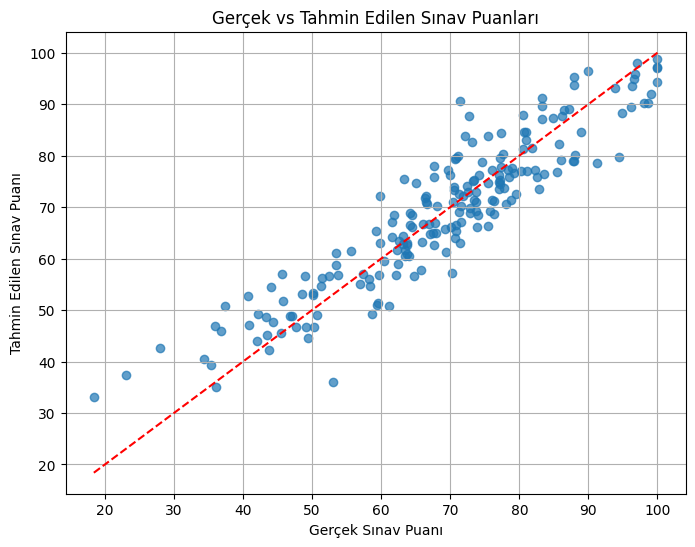

In [80]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Gerçek Sınav Puanı')
plt.ylabel('Tahmin Edilen Sınav Puanı')
plt.title('Gerçek vs Tahmin Edilen Sınav Puanları')
plt.grid(True)
plt.show()